### Importing Libraries

In [123]:
import pandas as pd 
import  numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import loguniform, uniform
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [124]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "bodyfat.csv"

# Load the latest version
body_data = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "fedesoriano/body-fat-prediction-dataset",
    file_path,
    # Provide any additional arguments like 
    # sql_query or pandas_kwargs. See the 
    # documenation for more information:
    # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print('Data loading process is done successfully.')

Data loading process is done successfully.


In [125]:
body_data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


### EDA

In [126]:
body_data.columns

Index(['Density', 'BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest',
       'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm',
       'Wrist'],
      dtype='object')

In [127]:
body_data.shape

(252, 15)

In [128]:
body_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [129]:
body_data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [130]:
body_data.duplicated().sum()

np.int64(0)

In [131]:
body_data['Weight'] = body_data['Weight'] * 0.45359237
body_data['Height'] = body_data['Height'] * 2.54

In [132]:
body_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Density,252.0,1.055574,0.019031,0.995000,1.041400,1.054900,1.070400,1.108900
BodyFat,252.0,19.150794,8.368740,0.000000,12.475000,19.200000,25.300000,47.500000
Age,252.0,44.884921,12.602040,22.000000,35.750000,43.000000,54.000000,81.000000
Weight,252.0,81.158745,13.330699,53.750696,72.121187,80.059053,89.357697,164.722069
Height,252.0,178.177976,9.303654,74.930000,173.355000,177.800000,183.515000,197.485000
Neck,252.0,37.992063,2.430913,31.100000,36.400000,38.000000,39.425000,51.200000
Chest,252.0,100.824206,8.430476,79.300000,94.350000,99.650000,105.375000,136.200000
Abdomen,252.0,92.555952,10.783077,69.400000,84.575000,90.950000,99.325000,148.100000
Hip,252.0,99.904762,7.164058,85.000000,95.500000,99.300000,103.525000,147.700000
Thigh,252.0,59.405952,5.249952,47.200000,56.000000,59.000000,62.350000,87.300000


In [133]:
body_data[body_data['Height'] < 150]

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
41,1.025,32.9,44,92.986436,74.93,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4


In [134]:
body_data.drop(index = 41, axis = 0, inplace = True)

In [135]:
body_data['BMI'] = body_data['Weight'] / np.pow(body_data['Height'] / 100, 2)

In [136]:
body_data = body_data[body_data['BodyFat'].between(5, 45)]

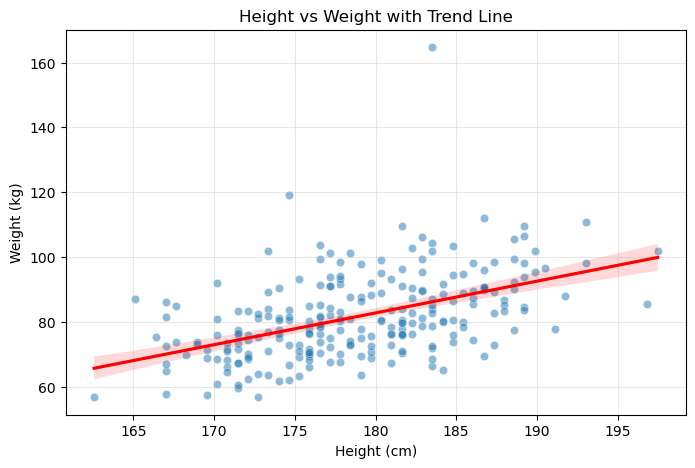

In [137]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=body_data,
    x='Height',
    y='Weight',
    alpha=0.5
)

sns.regplot(
    data=body_data,
    x='Height',
    y='Weight',
    scatter=False,
    color='red'
)

plt.title('Height vs Weight with Trend Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(alpha=0.3)

plt.show()

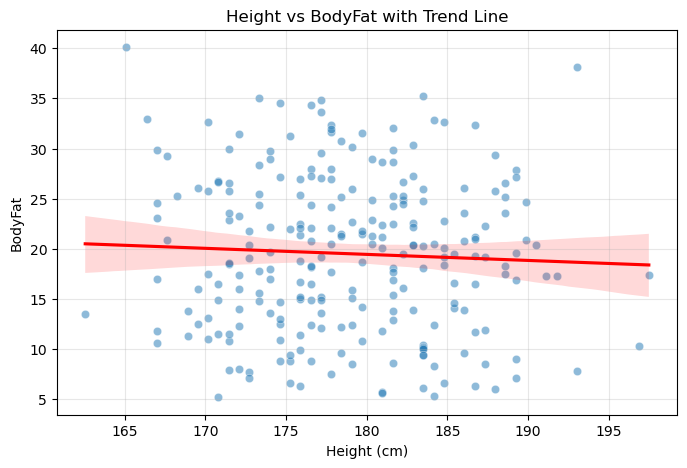

In [138]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=body_data,
    x='Height',
    y='BodyFat',
    alpha=0.5
)

sns.regplot(
    data=body_data,
    x='Height',
    y='BodyFat',
    scatter=False,
    color='red'
)

plt.title('Height vs BodyFat with Trend Line')
plt.xlabel('Height (cm)')
plt.ylabel('BodyFat')
plt.grid(alpha=0.3)

plt.show()

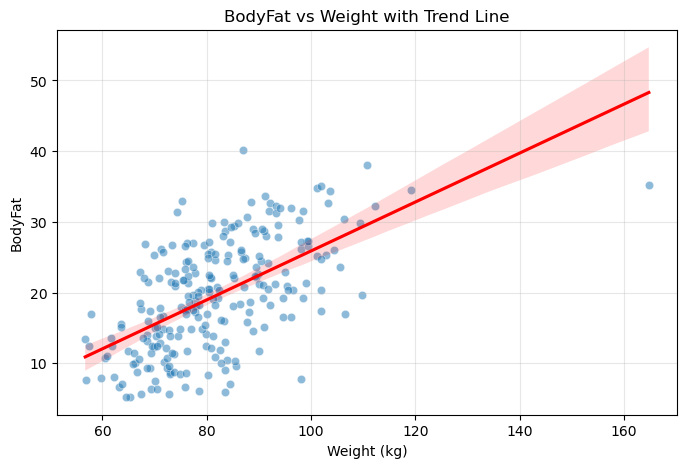

In [139]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=body_data,
    x='Weight',
    y='BodyFat',
    alpha=0.5
)

sns.regplot(
    data=body_data,
    x='Weight',
    y='BodyFat',
    scatter=False,
    color='red'
)

plt.title('BodyFat vs Weight with Trend Line')
plt.xlabel('Weight (kg)')
plt.ylabel('BodyFat')
plt.grid(alpha=0.3)

plt.show()

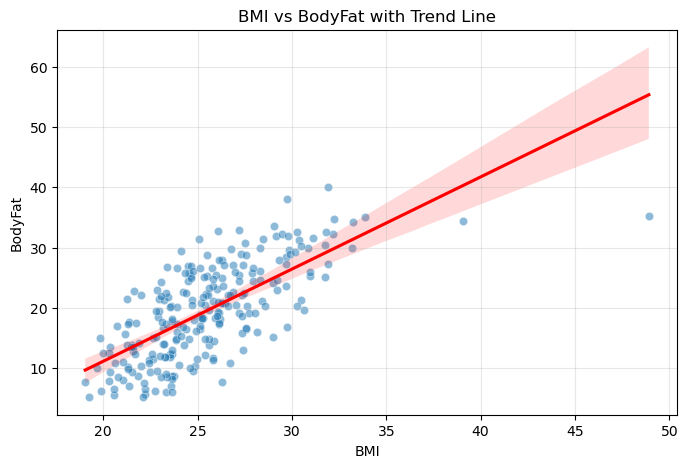

In [140]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=body_data,
    x='BMI',
    y='BodyFat',
    alpha=0.5
)

sns.regplot(
    data=body_data,
    x='BMI',
    y='BodyFat',
    scatter=False,
    color='red'
)

plt.title('BMI vs BodyFat with Trend Line')
plt.xlabel('BMI')
plt.ylabel('BodyFat')
plt.grid(alpha=0.3)

plt.show()

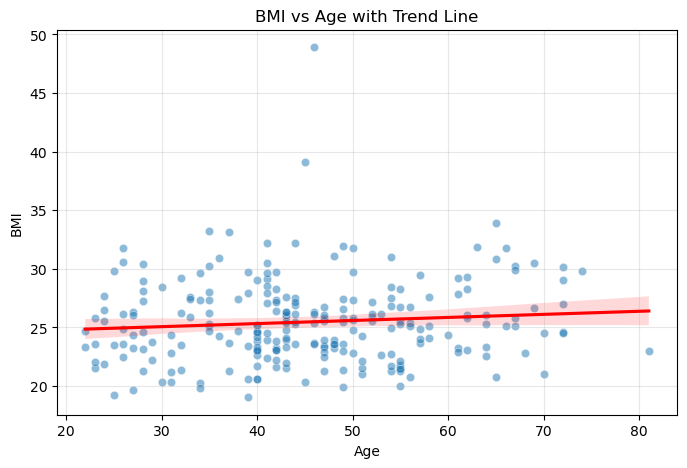

In [141]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=body_data,
    y='BMI',
    x='Age',
    alpha=0.5
)

sns.regplot(
    data=body_data,
    y='BMI',
    x='Age',
    scatter=False,
    color='red'
)

plt.title('BMI vs Age with Trend Line')
plt.ylabel('BMI')
plt.xlabel('Age')
plt.grid(alpha=0.3)

plt.show()

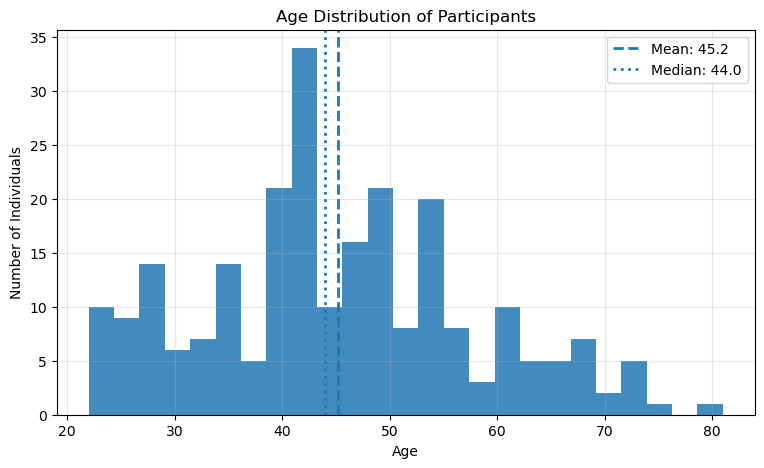

In [142]:
mean_age = body_data['Age'].mean()
median_age = body_data['Age'].median()

plt.figure(figsize=(9,5))
plt.hist(body_data['Age'], bins=25, alpha=0.85)

plt.axvline(mean_age, linestyle='--', linewidth=2, label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, linestyle=':', linewidth=2, label=f'Median: {median_age:.1f}')

plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

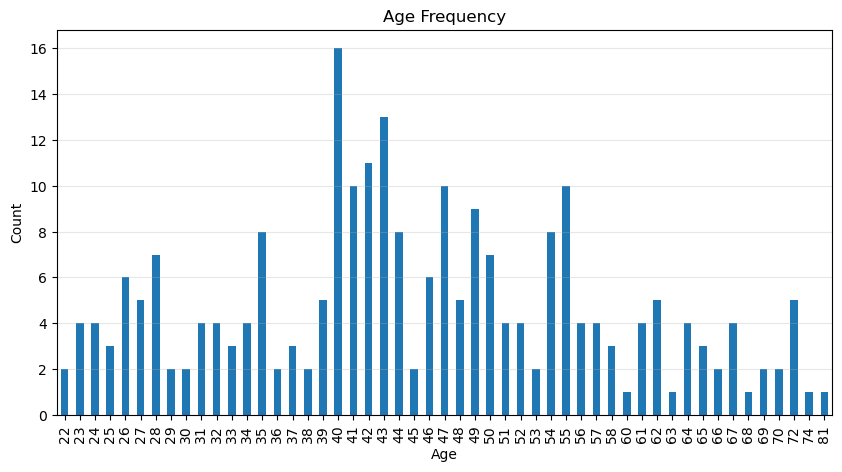

In [143]:
plt.figure(figsize=(10,5))
body_data['Age'].value_counts().sort_index().plot(kind='bar')

plt.title('Age Frequency')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

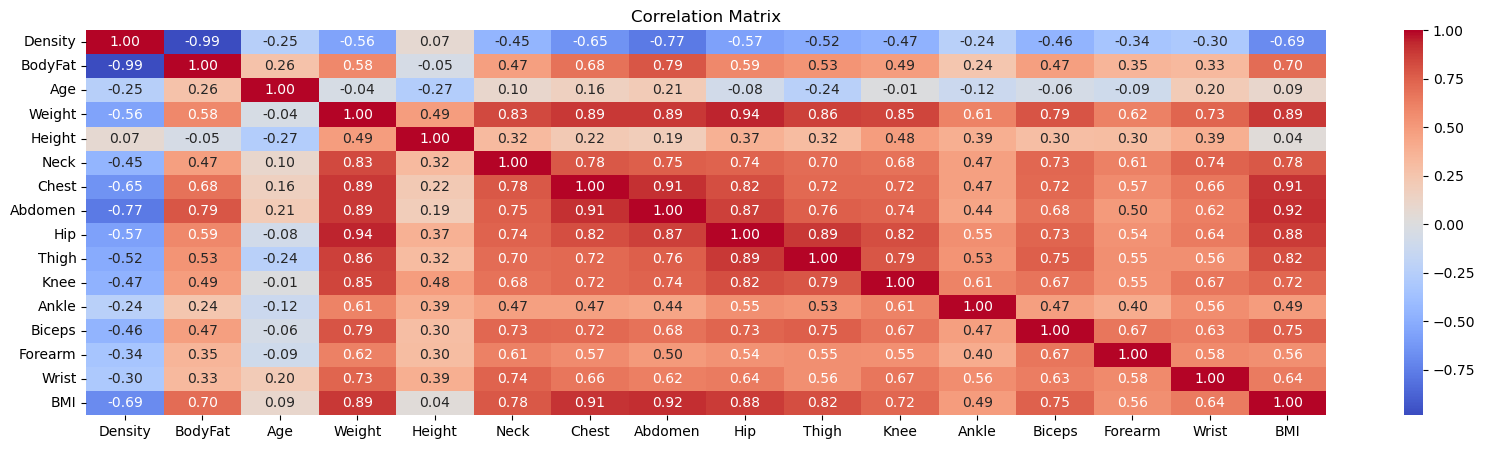

In [144]:
plt.figure(figsize = (20,5))

sns.heatmap(body_data.corr(), annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [145]:
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

body_data['BMI_cat'] = pd.cut(
    body_data['BMI'],
    bins=bins,
    labels=labels,
    right=False
)

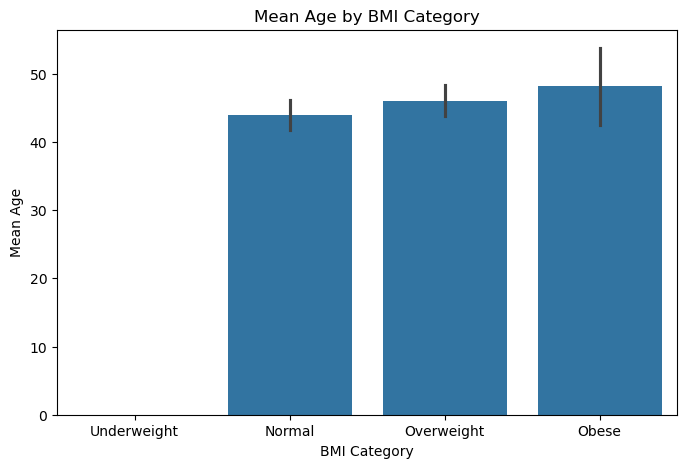

In [146]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='BMI_cat',
    y='Age',
    data=body_data,
    estimator='mean'
)

plt.title('Mean Age by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Mean Age')
plt.show()

### Model Preparation

In [147]:
X = body_data.drop(columns = ['Weight', 'Height', 'Density', 'BodyFat', 'BMI_cat'], axis = 1)
y = body_data['BodyFat'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

In [148]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Data Augmentation

In [149]:
noise_level = 0.01 * np.std(X_train_scaled, axis = 0)

In [150]:
def augment_gaussian(X, y, noise_level, n_aug):
    X_aug, y_aug = [], []
    
    for _ in range(n_aug):
        noise = np.random.normal(
            loc=0.0,
            scale=noise_level,
            size=X.shape
        )
        X_aug.append(X + noise)
        y_aug.append(y)
    
    return np.vstack(X_aug), np.hstack(y_aug)

In [151]:
X_noise, y_noise = augment_gaussian(X_train_scaled, y_train, noise_level, n_aug=2)

In [152]:
X_train_aug = np.vstack([X_train_scaled, X_noise])
y_train_aug = np.hstack([y_train, y_noise])

### Model Selection

In [153]:
lr_model = LinearRegression(n_jobs = -1)
lasso_model = Lasso(random_state = 42)
ridge_model = Ridge(random_state = 42)
elasticNet_model = ElasticNet(random_state = 42)

### Before Hyperparameter Tuning, Training, Prediction & Evaluation 

In [154]:
models = {
    'LR': lr_model,
    'Lasso': lasso_model,
    'Ridge': ridge_model,
    'ElasticNet': elasticNet_model
}

In [155]:
for name, model in models.items():
    model.fit(X_train_aug, y_train_aug)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred) 
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)   

    print(f'''Model name is {name}
    - MSE: {mse}
    - MAE: {mae}
    - R2: {r2}
------------------------------------------''')

Model name is LR
    - MSE: 16463445.948218798
    - MAE: 4020.6870204048837
    - R2: -281099.8935047424
------------------------------------------
Model name is Lasso
    - MSE: 58.596345920257555
    - MAE: 6.439875224701279
    - R2: -0.0004883088330263075
------------------------------------------
Model name is Ridge
    - MSE: 17109651.95408
    - MAE: 4114.542029241602
    - R2: -292133.372535016
------------------------------------------
Model name is ElasticNet
    - MSE: 20368.963106569903
    - MAE: 142.47180118980492
    - R2: -346.78464648474204
------------------------------------------


### Hyperparameter Tuning, Training, Prediction & Evaluation 

In [156]:
param_grids = {
    "LR": {
        # LinearRegression neredeyse tune edilmez
        "fit_intercept": [True, False]
    },

    "Lasso": {
        "alpha": loguniform(1e-4, 1),
        "max_iter": [5000, 10000]
    },

    "Ridge": {
        "alpha": loguniform(1e-3, 100)
    },

    "ElasticNet": {
        "alpha": loguniform(1e-4, 1),
        "l1_ratio": uniform(0.1, 0.9),
        "max_iter": [5000, 10000]
    },
}

In [157]:
best_models = {}
results = {}

for name, model in models.items():

    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grids[name],
        n_iter=30,                 
        cv=5,
        scoring="r2",
        n_jobs=-1,
        random_state=42
    )

    search.fit(X_train_aug, y_train_aug)

    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)

    best_models[name] = best_model
    results[name] = r2

    print(f"""Model name is {name}
    - Best Params: {search.best_params_}
    - Test R²: {r2:.4f}
-------------------------
""")

Model name is LR
    - Best Params: {'fit_intercept': True}
    - Test R²: 0.6693
-------------------------



Model name is Lasso
    - Best Params: {'alpha': np.float64(0.00010071984838809202), 'max_iter': 10000}
    - Test R²: 0.6692
-------------------------

Model name is Ridge
    - Best Params: {'alpha': np.float64(0.004982752357076452)}
    - Test R²: 0.6693
-------------------------

Model name is ElasticNet
    - Best Params: {'alpha': np.float64(0.00011299516083106625), 'l1_ratio': np.float64(0.9479815801163675), 'max_iter': 10000}
    - Test R²: 0.6692
-------------------------



### Best Model Selection

In [158]:
best_name = max(results, key=results.get)
best_model = best_models[best_name]

print("BEST MODEL:", best_name)

BEST MODEL: LR


### Visualization of Best Model Results 

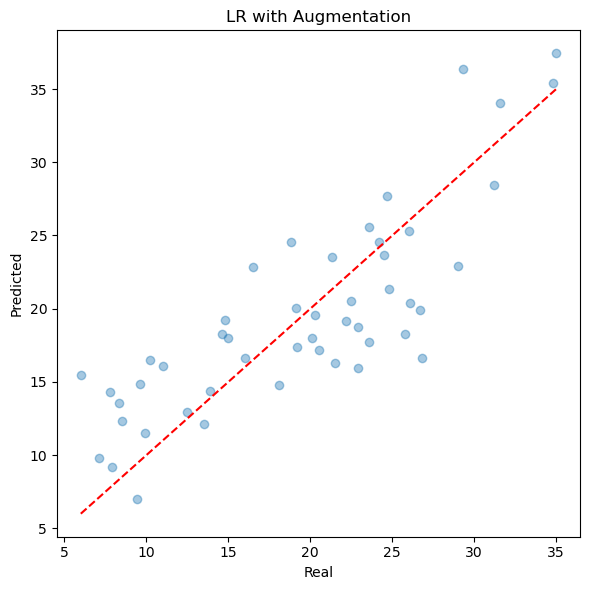

In [159]:
plt.figure(figsize=(6, 6))

# With augmentation
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--')
plt.title(f"{best_name} with Augmentation")
plt.xlabel("Real")
plt.ylabel("Predicted")

plt.tight_layout()
plt.show()